In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
import statistics

# Oceanographic Wave Fundamentals

## Generate Simulated Wave Signal
The below generated wave signal provides the time, and the surface elevation of the wave over time

In [54]:
def simulate_wave_data(duration, sampling_rate):
    num_points = int(duration * sampling_rate)
    time = np.linspace(0, duration, num_points)
    
    # Base wave components
    surface_elevation = (np.sin(2 * np.pi * 0.1 * time) + 
                   0.5 * np.sin(2 * np.pi * 0.05 * time) +
                   0.2 * np.sin(2 * np.pi * 0.2 * time))
    
    # Add random noise component
    noise_amplitude = 0.3
    surface_elevation += noise_amplitude * np.random.randn(num_points)
    
    return time, surface_elevation

In [171]:
# Parameters
duration = 150  # seconds
sampling_rate = 20  # Hz
window_size = 10
smoothing_window_length = 5

# Simulate wave data
time, surface_elevation = simulate_wave_data(duration, sampling_rate)

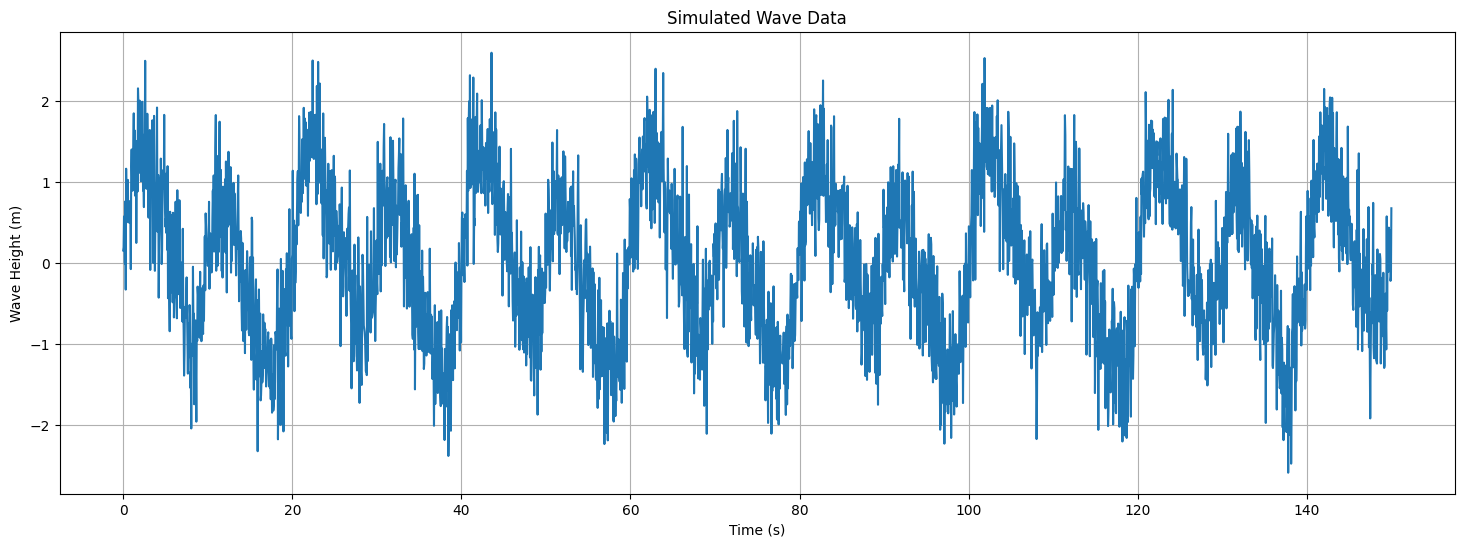

In [172]:
# Plot the simulated wave data
plt.figure(figsize=(18, 6))
plt.plot(time, surface_elevation)
plt.xlabel('Time (s)')
plt.ylabel('Wave Height (m)')
plt.title('Simulated Wave Data')
plt.grid(True)
plt.show()

### Significant Wave Height
The significant wave height can be calculated in two ways:
1. Calculated as the mean of the wave height (trough to crest) of 1/3 largest waves
2. Calculates a 4 times the standard deviation of the surface elevation.

In [188]:
def calculate_wave_height(wave_signal: np.ndarray, window_length: int):
    # Smooth the wave data to minimize noise
    smoothed_wave = uniform_filter1d(wave_signal, size=smoothing_window_length)
    # Find zero-crossings (assuming that generated waves have an elevation of zero)
    zero_crossings = np.where(np.diff(np.signbit(smoothed_wave)))[0]
    
    # Calculate individual wave heights
    wave_heights = []
    for i in range(1, len(zero_crossings)):
        wave_segment = wave_signal[zero_crossings[i-1]:zero_crossings[i]]
        wave_heights.append(np.max(wave_segment) - np.min(wave_segment))
    return wave_heights, smoothed_wave

def significant_wave_height_3(wave_heights: np.ndarray):
    ordered_list = np.sort(wave_heights)  # Sort the wave
    length_of_list = len(wave_heights)  # Calculate length of list

    highest_1_3 = ordered_list[2 * int(length_of_list/3):]  # Obtain highest 1/3 of waves
    sig_wave_height = np.mean(highest_1_3)  # calculate the mean
    return sig_wave_height

def H_s_over_time_1_3(wave_signal, window_size, sampling_rate):
    window_samples = int(window_size * sampling_rate)  # Calculate the number of window samples
    hs = []
    time_windows = []

    for start in range(0, len(wave_signal) - window_samples + 1, window_samples):
        window_end = start + window_samples
        wave_heights, _ = calculate_wave_height(wave_signal=wave_signal[start: window_end], window_length=sampling_rate)
        significant_wave_height_est_1_3 = significant_wave_height_3(wave_heights=wave_heights)
        time_windows.append(start / sampling_rate)
        hs.append(significant_wave_height_est_1_3)
    return hs, time_windows

In [194]:
wave_heights, smoothed_wave = calculate_wave_height(wave_signal=surface_elevation, window_length=window_size)  # Calculate wave heights
hs, time_windows = H_s_over_time_1_3(wave_signal=surface_elevation, window_size=window_size, sampling_rate=sampling_rate)  # Calculate significant wave heights over time

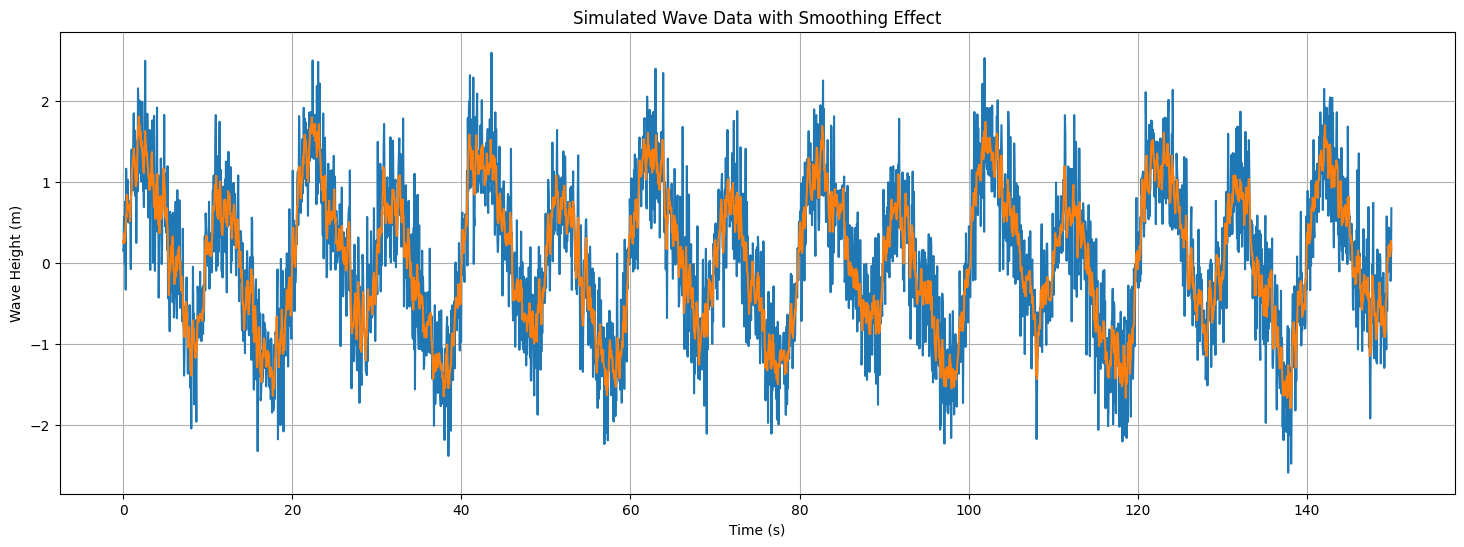

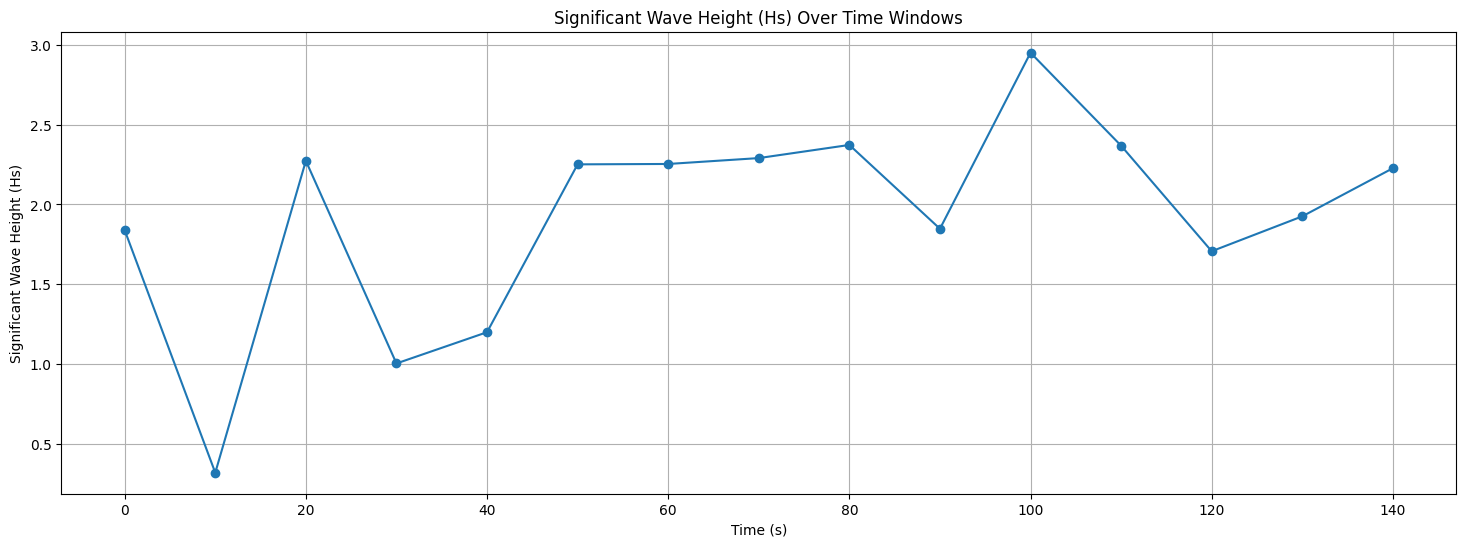

In [195]:
plt.figure(figsize=(18, 6))
plt.plot(time, surface_elevation)
plt.plot(time, smoothed_wave)
plt.xlabel('Time (s)')
plt.ylabel('Wave Height (m)')
plt.title('Simulated Wave Data with Smoothing Effect')
plt.grid(True)
plt.show()

# Plot the significant wave height over time windows
plt.figure(figsize=(18, 6))
plt.plot(time_windows, hs, marker='o')
plt.title('Significant Wave Height (Hs) Over Time Windows')
plt.xlabel('Time (s)')
plt.ylabel('Significant Wave Height (Hs)')
plt.grid(True)
plt.show()

In [196]:
def significant_wave_height_std(wave_signal: np.ndarray):
    std = np.std(wave_signal)  # Assuming wave height = surface elevation
    sig_wave_height = 4 * std
    return sig_wave_height

def H_s_over_time(wave_signal, window_size, sampling_rate):
    window_samples = int(window_size * sampling_rate)  # Calculate the number of window samples
    hs = []
    time_windows = []

    for start in range(0, len(wave_signal) - window_samples + 1, window_samples):
        window_end = start + window_samples
        sig_wave_height = significant_wave_height_std(wave_signal=wave_signal[start: window_end])
        time_windows.append(start / sampling_rate)
        hs.append(sig_wave_height)
    return hs, time_windows

In [200]:
hs, windows = H_s_over_time(wave_signal=smoothed_wave, window_size=window_size, sampling_rate=sampling_rate)

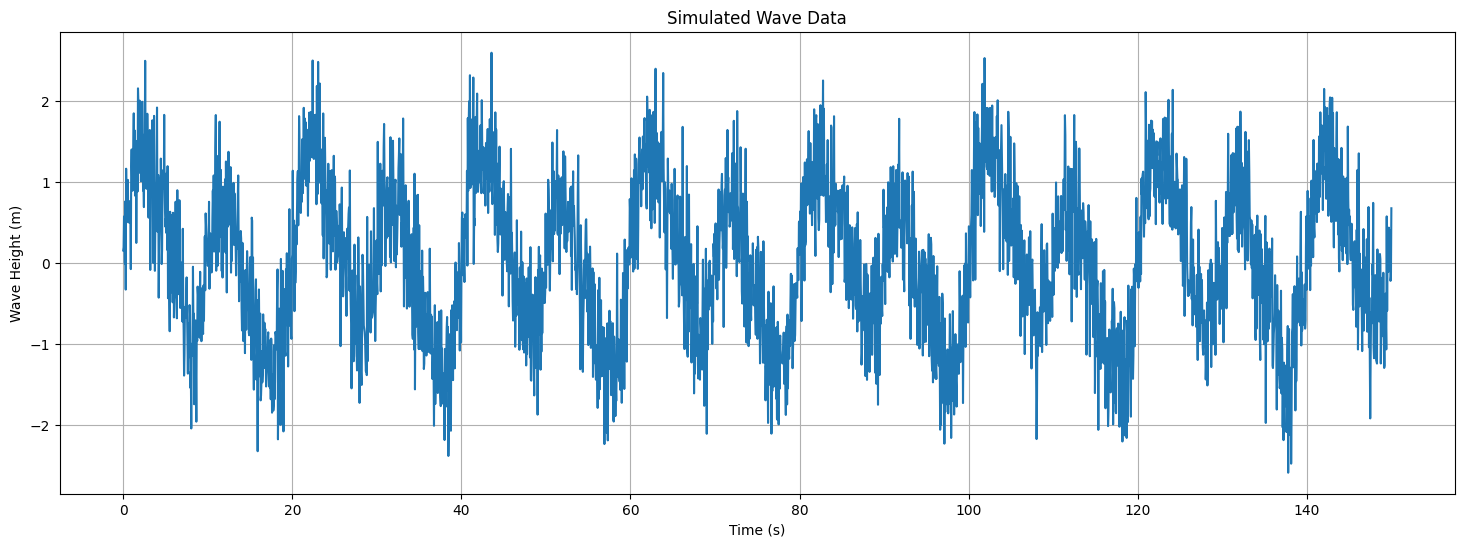

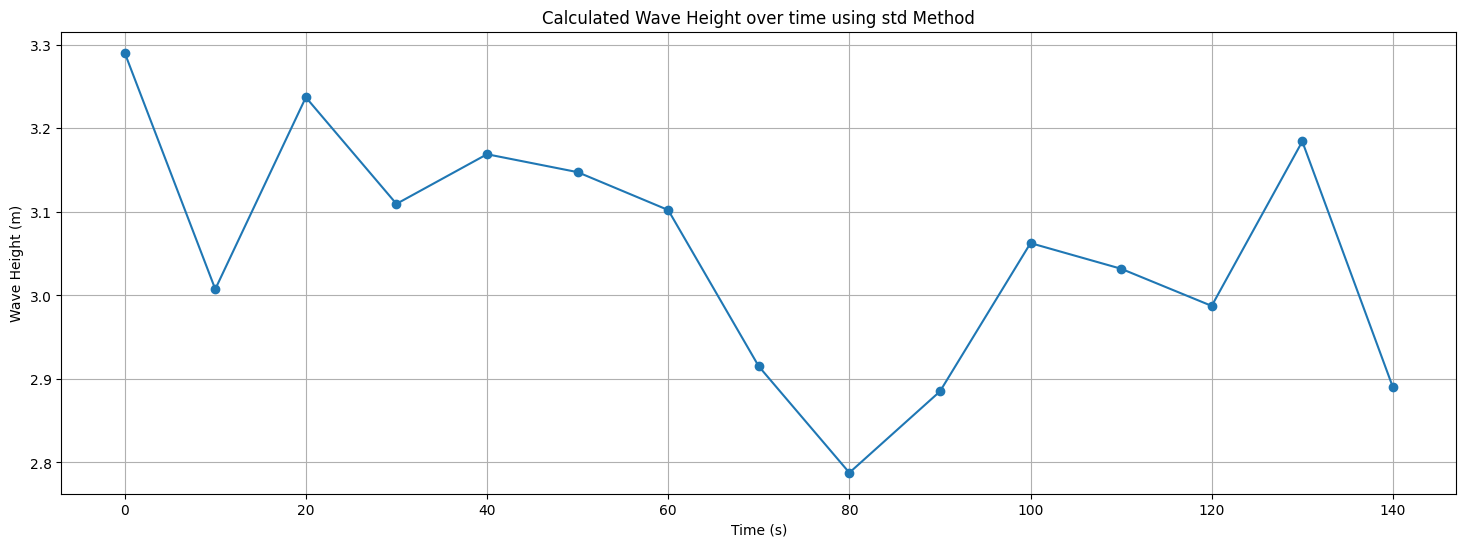

In [201]:
plt.figure(figsize=(18, 6))
plt.plot(time, surface_elevation)
plt.xlabel('Time (s)')
plt.ylabel('Wave Height (m)')
plt.title('Simulated Wave Data')
plt.grid(True)
plt.show()

# Plot the simulated wave data
plt.figure(figsize=(18, 6))
plt.plot(time_windows, hs, marker='o')
plt.xlabel('Time (s)')
plt.ylabel('Wave Height (m)')
plt.title('Calculated Wave Height over time using std Method')
plt.grid(True)
plt.show()